In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParamsDefault['figure.figsize']

[6.4, 4.8]

In [2]:
# set graphics styles

scale_x = 2
scale_y = 1.5
figsize = (6.4*scale_x, 4.8*scale_y)
plt.rcParams['figure.figsize'] = figsize
sns.set(rc={'figure.figsize': figsize})
plt.style.use('seaborn-darkgrid')

### Load Data

In [3]:
data = pd.read_csv('data/caso_practico_data.csv')

data.head()

,plk-invoice-number,xyz-branch,city-ghh-998,type-usr-search,gender,category-catalog-dsp,cost of goods sold,sale,dateddmmyyy,time,payment-type-full,review
0,750-67-8428,A,Nueva York,Member,Female,Health and beauty,522.83,548.9715,01/05/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Houston,Normal,Female,Electronic accessories,76.40,80.2200,03/08/2019,10:29,Cash,9.6
2,631-41-3108,A,Nueva York,Normal,Male,Home and lifestyle,324.31,340.5255,03/03/2019,13:23,Credit card,7.4
3,123-19-1176,A,Nueva York,Member,Male,Health and beauty,465.76,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Nueva York,Normal,Male,Sports and travel,604.17,634.3785,02/08/2019,10:37,Ewallet,5.3


#### Change columns name

In [4]:
name_mapper = {
    'plk-invoice-number': 'invoice',
    'xyz-branch': 'branch',
    'city-ghh-998': 'city',
    'type-usr-search': 'type',
    'category-catalog-dsp': 'category',
    'cost of goods sold': 'cogs',
    'sale': 'sales',
    'dateddmmyyy': 'date',
    'payment-type-full': 'payment',
}

data.rename(columns=name_mapper, inplace=True)

data.head()

,invoice,branch,city,type,gender,category,cogs,sales,date,time,payment,review
0,750-67-8428,A,Nueva York,Member,Female,Health and beauty,522.83,548.9715,01/05/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Houston,Normal,Female,Electronic accessories,76.40,80.2200,03/08/2019,10:29,Cash,9.6
2,631-41-3108,A,Nueva York,Normal,Male,Home and lifestyle,324.31,340.5255,03/03/2019,13:23,Credit card,7.4
3,123-19-1176,A,Nueva York,Member,Male,Health and beauty,465.76,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Nueva York,Normal,Male,Sports and travel,604.17,634.3785,02/08/2019,10:37,Ewallet,5.3


In [5]:
data.groupby('city').sum()

,cogs,sales,review
city,,,
Chicago,101140.64,106197.6720,2263.6
Houston,105303.53,110568.7065,2319.9
Nueva York,101143.21,106200.3705,2389.2


### Total sales, cogs and review group by city

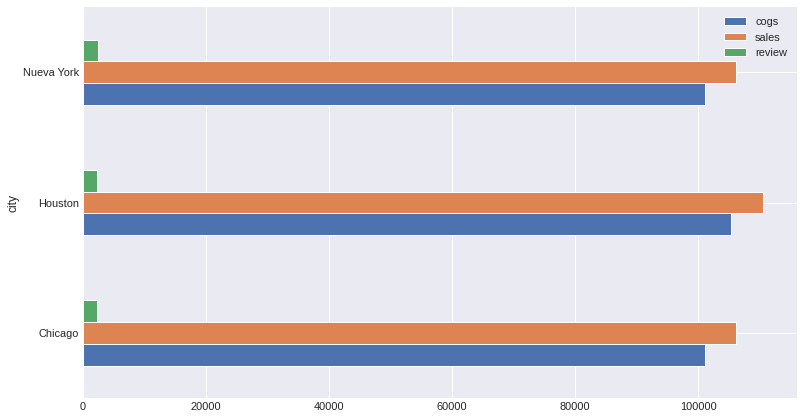

In [6]:
data.groupby('city').sum().plot(kind='barh')

plt.show()

### Sum of reviews group by category

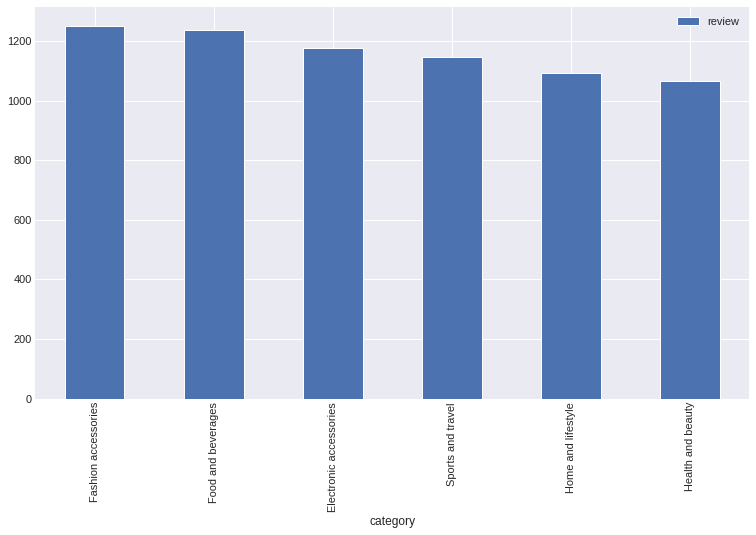

In [7]:
data[['category', 'review']].groupby('category').sum().sort_values(by='review', ascending=False).plot(kind='bar')

plt.show()

### Percentage of customers by gender

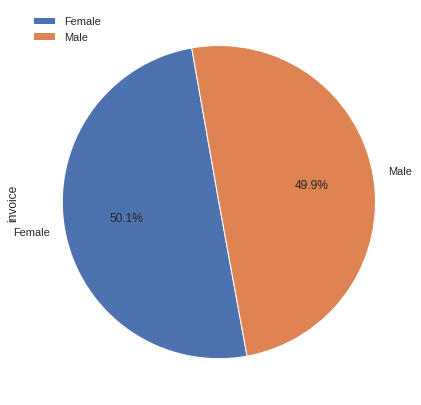

In [8]:
data[['gender', 'invoice']].groupby('gender').count().plot(kind='pie', subplots=True, startangle=100, autopct='%1.1f%%')

plt.show()

### Payment methods

In [9]:
data[['payment', 'invoice']].groupby('payment').count()

,invoice
payment,
Cash,344
Credit card,311
Ewallet,345


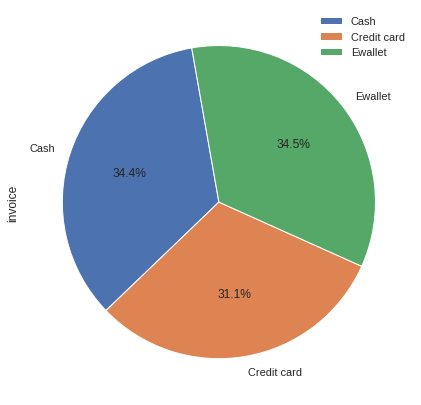

In [10]:
data[['payment', 'invoice']].groupby('payment').count().plot(kind='pie', subplots=True, startangle=100, autopct='%1.1f%%')

plt.show()

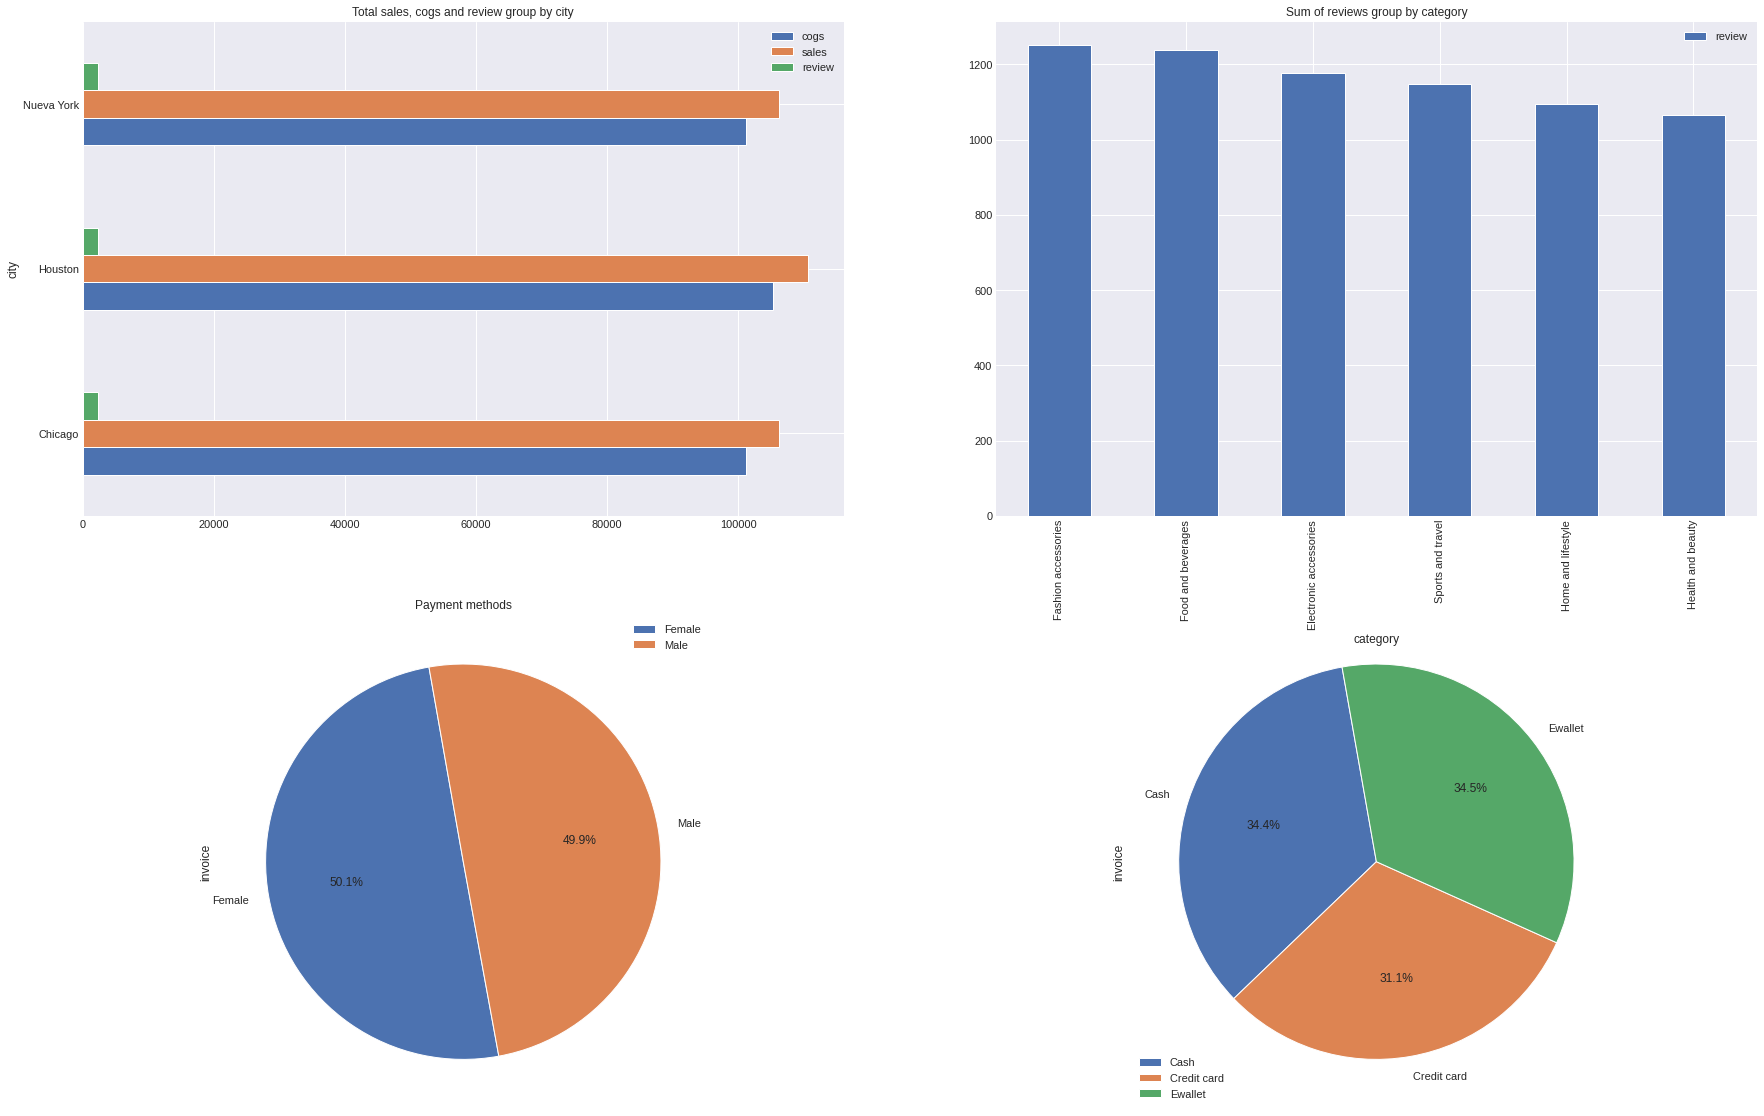

In [11]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30,20))

ax1.set_title('Total sales, cogs and review group by city')
data.groupby('city').sum().plot(kind='barh', ax=ax1)

ax2.set_title('Sum of reviews group by category')
data[['category', 'review']].groupby('category').sum().sort_values(by='review', ascending=False).plot(kind='bar', ax=ax2)

ax3.set_title('Percentage of customers group by gender')
data[['gender', 'invoice']].groupby('gender').count().plot(kind='pie', subplots=True, startangle=100, autopct='%1.1f%%', ax=ax3)

ax3.set_title('Payment methods')
data[['payment', 'invoice']].groupby('payment').count().plot(kind='pie', subplots=True, startangle=100, autopct='%1.1f%%', ax=ax4)




plt.show()